## Variant 5
2, 4, 6, 7, 9, 10, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27

In [4]:
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv('archive/NationalNames.csv')

In [24]:
# task 2
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [25]:
# task 4
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [26]:
# task 6
df.groupby(by=['Gender'])['Name'].nunique()

Gender
F    64911
M    39199
Name: Name, dtype: int64

In [27]:
# task 7
df[(df.Gender == 'M') & (df.Year == 2010)].sort_values(by=['Count'], ascending=False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [28]:
# task 9
len(df[df.Count == min(df.Count)])

254615

In [29]:
# task 10
df.groupby(by=['Year'])['Name'].nunique()

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [30]:
# task 15
df.groupby(by=['Year'])['Count'].sum()

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

In [31]:
# task 16
df.groupby(by=['Year'])['Count'].sum().idxmax()

1957

In [32]:
# task 17
df.groupby(by=['Year', 'Gender'])['Count'].sum().to_frame()

Count
Year Gender         
1880 F         90993
     M        110491
1881 F         91954
     M        100745
1882 F        107850
...              ...
2012 M       1889414
2013 F       1745339
     M       1881463
2014 F       1768775
     M       1901376

[270 rows x 1 columns]

In [33]:
# task 18
male_df = df[df.Gender == 'M'].groupby(by=['Year'])['Count'].sum()
female_df = df[df.Gender == 'F'].groupby(by=['Year'])['Count'].sum()
(male_df < female_df).sum()

54

In [34]:
# task 20
male_names = df[df.Gender == 'M']['Name']
female_names = df[df.Gender == 'F']['Name']
len(np.intersect1d(male_names.values,female_names.values))

10221

In [37]:
# task 21
df[(df.Gender == 'M') & (df.Name == 'Barbara')]['Count'].sum()

4139

In [38]:
# task 23
male = df[df.Gender == 'M']['Name'].drop_duplicates()
female = df[df.Gender == 'F']['Name'].drop_duplicates()
gender_neutral_names = male[male.isin(female)]
years_count = df.Year.unique().size
df[df.Name.isin(gender_neutral_names)].groupby('Name').filter(lambda d: d['Year'].unique().size == years_count).groupby('Name')['Count'].max().sort_values(ascending=False).to_frame()


,Count
Name,
Linda,99680
James,94755
Michael,92709
Robert,91642
John,88318
...,...
Price,64
Nevada,60
Ara,55


In [39]:
# task 24
df[df.Name.isin(gender_neutral_names)].groupby('Name').filter(lambda d: d['Year'].unique().size != years_count).groupby('Name')['Count'].max().sort_values(ascending=False).index[0]


'Jennifer'

<Axes: xlabel='Year'>

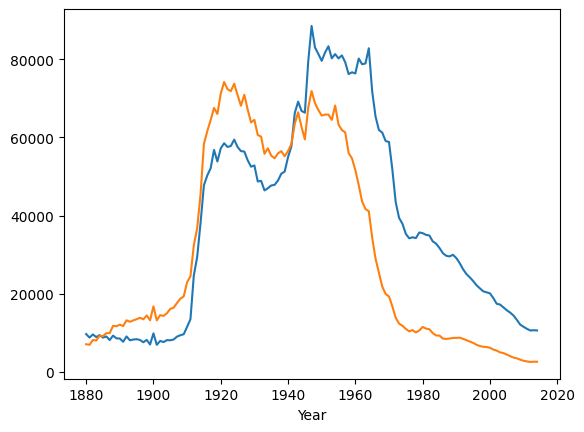

In [41]:
# task 25
df[df.Name == 'John'].groupby('Year')['Count'].sum().plot()
df[df.Name == 'Mary'].groupby('Year')['Count'].sum().plot()

<Axes: xlabel='Year'>

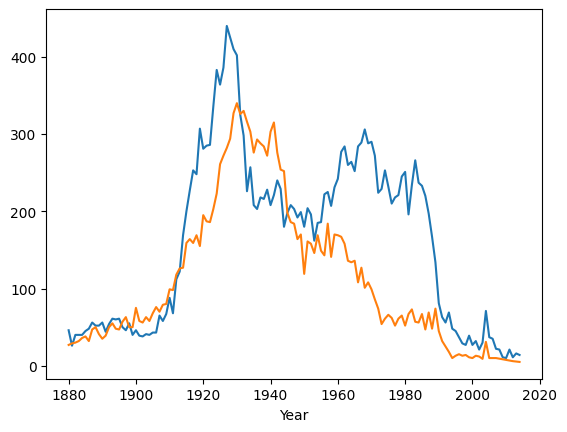

In [42]:
# task 26
df[(df.Name == 'John') & (df.Gender == 'F')].groupby('Year')['Count'].sum().plot()
df[(df.Name == 'Mary') & (df.Gender == 'M')].groupby('Year')['Count'].sum().plot()


In [43]:
# task 27
df.groupby(['Year']).apply(lambda d: d[d.Count == d.Count.max()].iloc[0][['Name', 'Count']])

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
